# Metric: Pre1950s Housing: MATT
In just about every depiction of ghosts, they are always in creaky old houses, so logically the neighborhood with the most older houses (WPRDC defines older as built before 1950) would be a good spot to bust some ghosts.

In [62]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

housing = pd.read_csv('housing.csv', sep=",")
housing

,TRACT,Pre1950
0,10300,0.658477
1,20100,0.321088
2,20300,0.724907
3,30500,0.324117
4,40200,0.463549
...,...,...
388,980000,0.353982
389,980100,0.000000
390,980700,0.619048
391,981100,0.000000


First, we gotta import the "Older Housing" data into the notebook. Unfortunately, the data only gives the census tract number of the neighborhood, rather than the neighborhood itself, so we'll have to do some manuevers to make them line up later.
<br /> The data is also for the entirety of Allegheny county, so we'll need to narrow it down to just the Pittsburgh neighborhoods.
<br /> The dataset also gives the percentage of houses (in decimal form) that were built before 1950, which this dataset defines as being older houses. Nice! :)

Going to use this link to cypher through everything and find all these tracts
https://openac-alcogis.opendata.arcgis.com/datasets/allegheny-county-census-tracts-2016/explore?location=40.437759%2C-79.966100%2C12.87

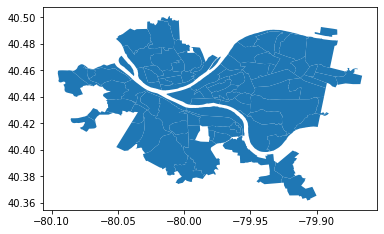

In [63]:
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
neighborhoods.plot()

Here we are reading in the neighborhoods map so that we have something to merge with and display our data over the fabulous layout of Pittsburgh, the greatest city in the world!!!!!

In [86]:
hoods = pd.read_csv("Neighborhoods_.csv", sep =",")

We're reading in the neighborhoods CSV so that we can merge it with the older housing data. Since the older housing data applies for all of Allegheny county, this merge is going to act as a filter that narrows it down to only Pittsburgh neighborhoods.

In [107]:
hoods.iloc[0,4] = "260200"
hoods['tractce10'] = hoods['tractce10'].astype(pd.np.int64)
#print(hoods.dtypes)
hoods


<ipython-input-107-136d9145104f>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hoods['tractce10'] = hoods['tractce10'].astype(pd.np.int64)


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1310,0,,,260200,,,,,,...,0.000000e+00,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.466740e+07,31289.384410
1,1339,25,42,003,10300,2,420030103002,Block Group 2,G5030,S,...,9.127700e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,9.127072e+06,15724.430916
2,1334,6,42,003,20100,4,420030201004,Block Group 4,G5030,S,...,1.784669e+07,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.784589e+07,23034.972831
3,1333,5,42,003,20300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.694873e+07,24019.525964
4,1332,3,42,003,30500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,7.203337e+06,15697.914337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.068796e+07,19600.573085
86,1375,151,42,003,980700,1,420039807001,Block Group 1,G5030,S,...,5.905660e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,5.903800e+06,21342.948526
87,1308,240,42,003,980900,1,420039809001,Block Group 1,G5030,S,...,6.426351e+06,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.494916e+07,50372.656980
88,1335,15,42,003,981000,1,420039810001,Block Group 1,G5030,S,...,2.684846e+07,15,Andrea Lavin Kossis,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.684814e+07,25436.466636


For whatever reason, Stephanie Joy Everett really dropped the ball and didn't include the Perry North tract data. So I had to go on a quest to look up the area's tract data myself and enter into the dataset. All of the tract data in the neighborhood data was a string, but the housing csv has it in int form. So then I had to convert the string stuff to int format, and after that it was ready to merge. 

In [110]:
fiftys = hoods.merge(housing, how='left', left_on='tractce10', right_on='TRACT')
fiftys = fiftys[['hood', 'Pre1950']]
fiftys = fiftys.sort_values('Pre1950', ascending=False)
fiftys


,hood,Pre1950
31,Regent Square,0.915811
47,Central Northside,0.905109
26,Homewood North,0.880952
18,Upper Lawrenceville,0.855430
36,South Side Slopes,0.847349
...,...,...
71,Allegheny Center,0.173913
89,Point Breeze,0.000000
85,Chateau,NaN
87,Marshall-Shadeland,NaN


In this block of code I merged together my neighborhoods CSV to my older housing CSV, and cut out everything included that didn't need to be. In the end, the two columns I kept were the neighborhood name and the percentage of houses in it that were built before the 1950s. I included a call to the table so that I could ensure that it all merged correctly.
<br /> Unfortunately, three datasets in the neighborhoods files were not included in the 1950s housing file, so we need to ignore those in the analysis.

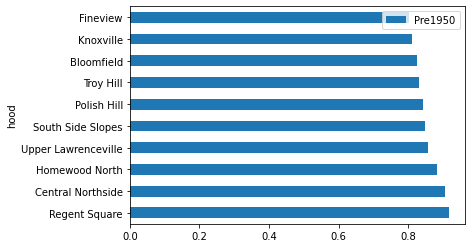

In [118]:
barh = fiftys.head(10).plot.barh(x='hood')

I put all my data into a horizontal bar graph, cause it looks pretty sweet. Also on vertical bar graphs the labels are vertical too and that looks kinda dumb. 

In [106]:
fiftys.head()

,hood,Pre1950
31,Regent Square,0.915811
47,Central Northside,0.905109
26,Homewood North,0.880952
18,Upper Lawrenceville,0.855430
36,South Side Slopes,0.847349


These are the top five neighborhoods and their respective percentages of houses that are old. I included this call because it's a close race between the tops, 

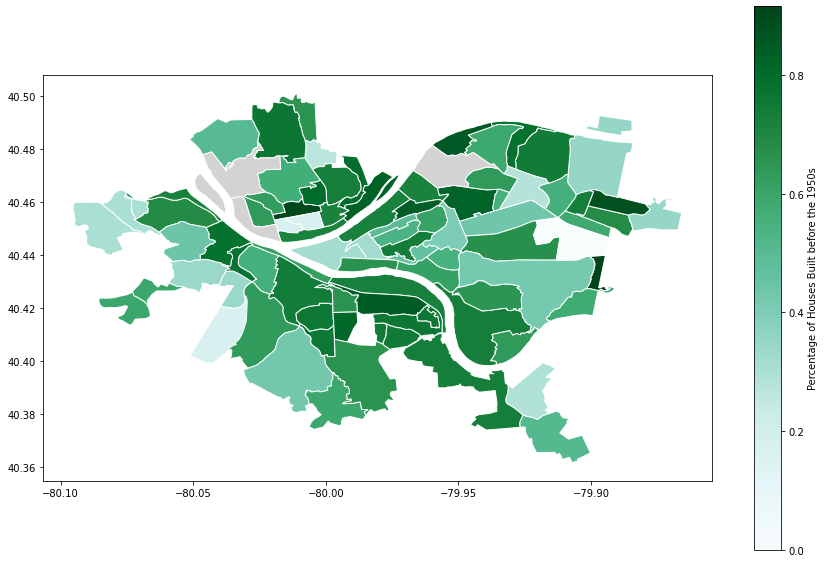

In [111]:
fiftysMap = neighborhoods.merge(fiftys, how = 'left', left_on='hood', right_on='hood')
fiftysMap.plot(column='Pre1950',
              cmap='BuGn',
              edgecolor='white',
              legend=True,
              legend_kwds={'label':'Percentage of Houses Built before the 1950s'},
              figsize=(15, 10),
              missing_kwds={'color': 'lightgrey'}
              )